In [113]:
%matplotlib inline

# Pymaceuticals Inc.
---

### Analysis

-Looking at the individual mouse on Capomulin it would seem that the treatment reduced the tumor size in the mouse over the course of time. 
There appears to be a strong correlation between weight and tumor size as well. We could look further into all of the individual mice in Capomulin to see if the results were consistent across the board, including mice over a certain weight since that seems to have a correlation with bigger tumor size. In fact, we could do this for every type of treatment to get more detailed answers. 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete_df = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [115]:
# Checking the number of mice.
mouse_data_complete_df["Mouse ID"].nunique()

249

In [116]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = mouse_data_complete_df[mouse_data_complete_df[["Mouse ID", "Timepoint"]].duplicated(keep=False) == True]
duplicated_df["Mouse ID"].unique()


array(['g989'], dtype=object)

In [117]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = mouse_data_complete_df.loc[mouse_data_complete_df["Mouse ID"] == "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_data_complete_df.rename(columns={"Mouse ID": "Mouse_ID"},inplace= True)
clean_study_data_df = mouse_data_complete_df[mouse_data_complete_df.Mouse_ID != 'g989']
clean_study_data_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [119]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_df["Mouse_ID"].nunique()

248

## Summary Statistics

In [120]:
mean_tumor_volume = clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_stdev = clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_error = clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_data= {"Mean Tumor Volume": mean_tumor_volume,
              "Median Tumor Volume": median_tumor_volume,
              "Tumor Volume Variance": tumor_volume_variance,
              "Tumor Volume Std. Dev.": tumor_volume_stdev,
              "Tumor Volume Std. Err.": tumor_volume_error}
summary_df = pd.DataFrame(summary_data)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_study_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

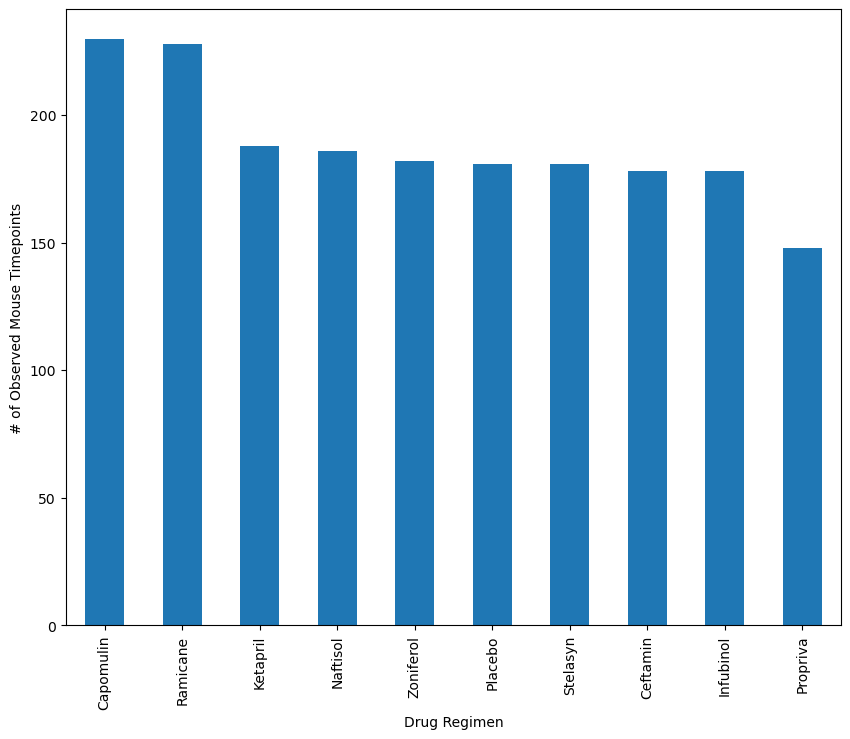

<Figure size 640x480 with 0 Axes>

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using 
timepoint_count = clean_study_data_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint_sort = timepoint_count.sort_values(ascending = False)
drug_timepoint_df = pd.DataFrame(timepoint_sort)
timepoint_chart= timepoint_sort.plot(kind='bar', figsize=(10,8,))
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()


In [123]:
drug_timepoint_df_reset = drug_timepoint_df.reset_index()
drug_timepoint_df_reset

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


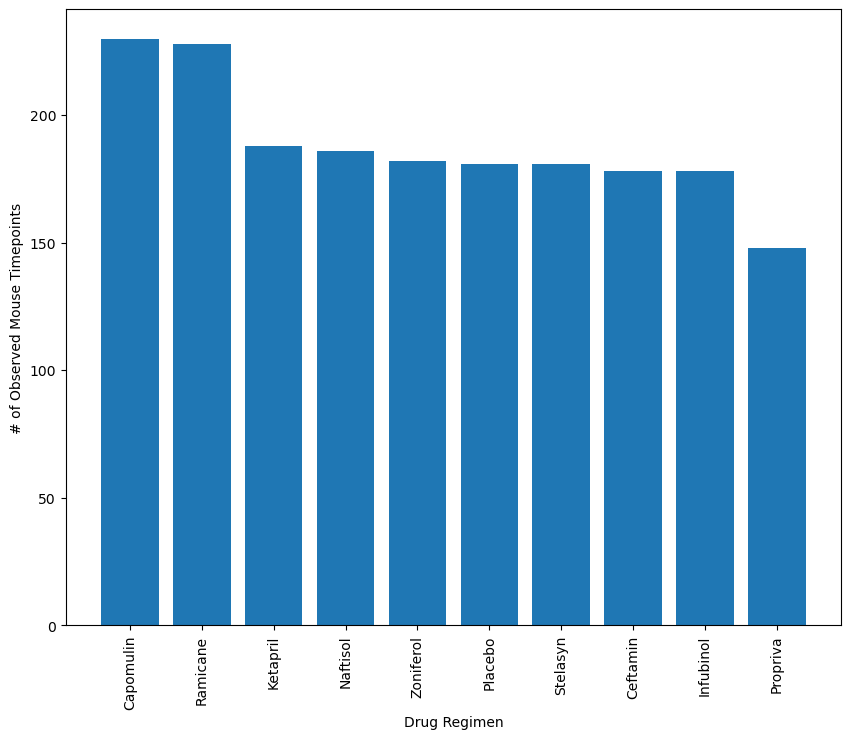

In [124]:
# Generate a bar plot showing total number of rows (Mouse ID/Timepoint) for each drug regimen using pyplot
x_axis = np.arange(len(drug_timepoint_df_reset))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10, 8))
plt.bar(x_axis, drug_timepoint_df["Timepoint"], align="center")
plt.xticks(tick_locations, drug_timepoint_df_reset["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#select gender data from the DataFrame
mice_gender = clean_study_data_df.groupby(["Sex"])["Sex"].count()
mice_gender_df = pd.DataFrame(mice_gender)
mice_gender_df

,Sex
Sex,
Female,922
Male,958


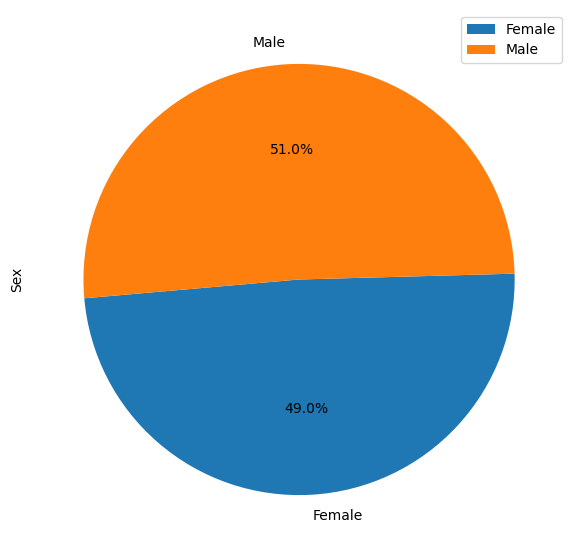

In [126]:
#show graph of the mouse gender
gender_pie = mice_gender_df.plot.pie(y="Sex", startangle=185,autopct="%1.1f%%", figsize=(7,7))
plt.show()

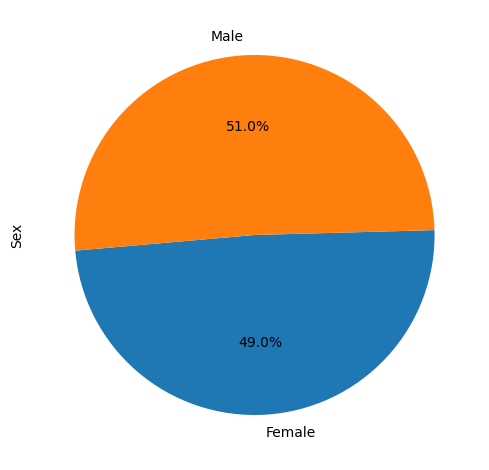

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie2 = mice_gender_df["Sex"]
gender_labels = ["Female", "Male"]
plt.pie(gender_pie2, labels=gender_labels, startangle=185, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers, and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_data_df.groupby(["Mouse_ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df= pd.merge(clean_study_data_df, last_timepoint_df, how="right", on=["Mouse_ID", "Timepoint"])
max_timepoint_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in max_timepoint_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        tumor_vol_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_vol_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_vol_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_vol_cef.append(row['Tumor Volume (mm3)'])

drug_df = pd.DataFrame({treatments[0]: tumor_vol_cap,
                       treatments[1]: tumor_vol_ram,
                       treatments[2]: tumor_vol_inf,
                       treatments[3]: tumor_vol_cef
                       })
drug_df



,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [130]:
# Calculate potential outliers for Capomulin
quartile_cap = drug_df[treatments[0]].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
med_cap = quartile_cap[0.5]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of Capomulin is: {lowerq_cap}")
print(f"The upper quartile of Capomulin is: {upperq_cap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The median of Capomulin is: {med_cap} ")

lowerb_cap = lowerq_cap - (1.5*iqr_cap)
upperb_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lowerb_cap} could be outliers.")
print(f"Values above {upperb_cap} could be outliers.")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [131]:
# Calculate potential outliers for Ramicane
quartile_ram = drug_df[treatments[1]].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartile_ram[0.25]
med_ram = quartile_ram[0.5]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of Ramicane is: {lowerq_ram}")
print(f"The upper quartile of Ramicane is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The median of Ramicane is: {med_ram} ")

lowerb_ram = lowerq_ram - (1.5*iqr_ram)
upperb_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lowerb_ram} could be outliers.")
print(f"Values above {upperb_ram} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [132]:
# Calculate potential outliers for Infubinol
quartile_inf = drug_df[treatments[2]].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
med_inf = quartile_inf[0.5]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of Infubinol is: {lowerq_inf}")
print(f"The upper quartile of Infubinol is: {upperq_inf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The median of Infubinol is: {med_inf} ")

lowerb_inf = lowerq_inf - (1.5*iqr_inf)
upperb_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lowerb_inf} could be outliers.")
print(f"Values above {upperb_inf} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [133]:
# Calculate potential outliers for Ceftamin
quartile_cef = drug_df[treatments[3]].quantile([0.25, 0.5, 0.75])
lowerq_cef = quartile_cef[0.25]
med_cef = quartile_cef[0.5]
upperq_cef = quartile_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

print(f"The lower quartile of Ceftamin is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin is: {upperq_cef}")
print(f"The interquartile range of Ceftamin is: {iqr_cef}")
print(f"The median of Ceftamin is: {med_cef} ")

lowerb_cef = lowerq_cef - (1.5*iqr_cef)
upperb_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lowerb_cef} could be outliers.")
print(f"Values above {upperb_cef} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [134]:
# Summarize potential outliers 
outliers_summary_df = pd.DataFrame({"Drug": treatments, 
                                    "Lower Quartile": [lowerq_cap, lowerq_ram, lowerq_inf, lowerq_cef],
                                    "Upper Quartile": [upperq_cap, upperq_ram, upperq_inf, upperq_cef], 
                                    "IQR": [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                                    "Median": [med_cap, med_ram, med_inf, med_cef],
                                    "Lower Bound": [lowerb_cap, lowerb_ram, lowerb_inf, lowerb_cef], 
                                    "Upper Bound": [upperb_cap, upperb_ram, upperb_inf, upperb_cef]})

outliers_summary_df

,Drug,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


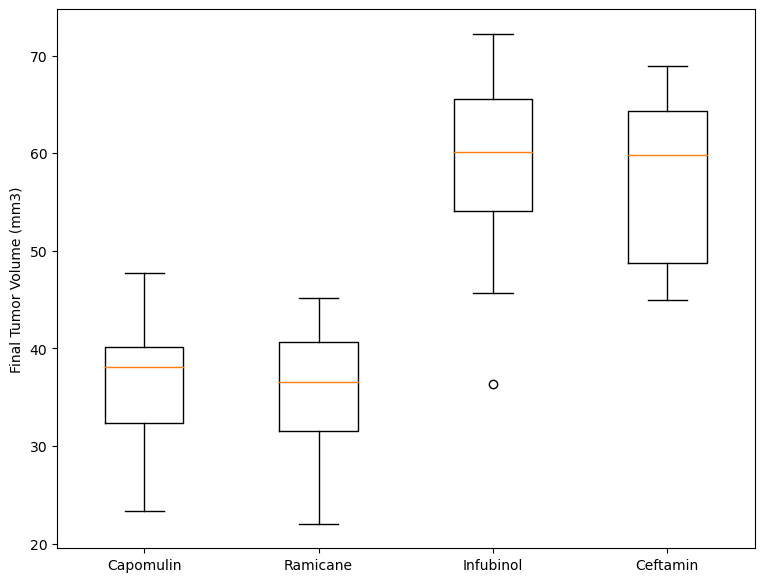

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs_boxplot = [drug_df[treatments[0]],
                 drug_df[treatments[1]],
                 drug_df[treatments[2]],
                 drug_df[treatments[3]]]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(drugs_boxplot, 0)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

In [136]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_study_data_df.loc[clean_study_data_df["Mouse_ID"]== "l509"]
capomulin_mouse


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


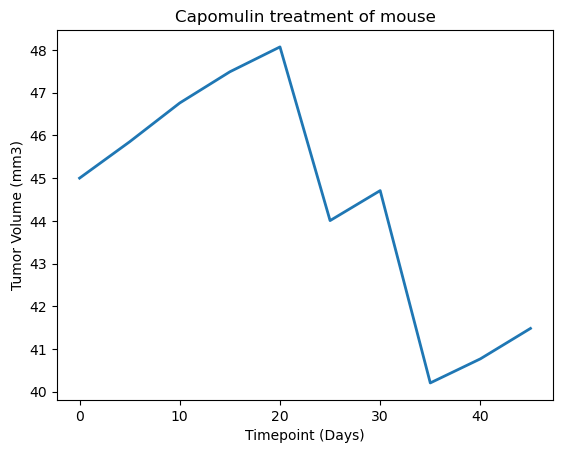

In [137]:
l509_X = capomulin_mouse["Timepoint"]
l509_Y = capomulin_mouse["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse")
plt.plot(l509_X, l509_Y, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


C:\Users\caleb\AppData\Local\Temp\ipykernel_1620\1803844975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tum_vol = capomulin_mice.groupby(["Mouse_ID"]).mean()


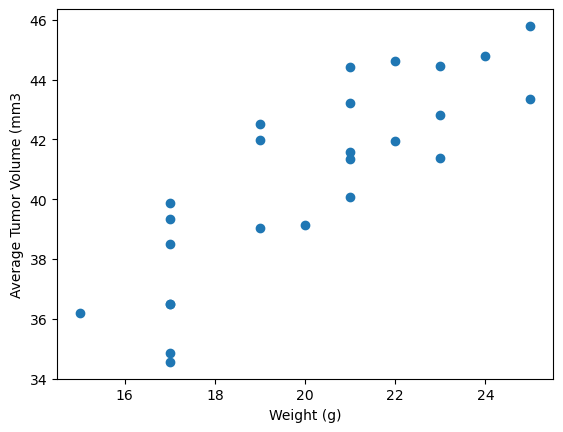

In [138]:
capomulin_mice = clean_study_data_df.loc[clean_study_data_df["Drug Regimen"] == "Capomulin"]
avg_tum_vol = capomulin_mice.groupby(["Mouse_ID"]).mean()
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin r
avg_tum_vol
plt.scatter(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


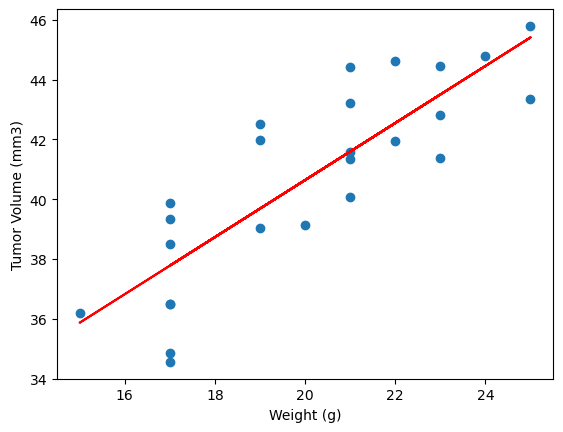

In [139]:
#Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_tum_vol["Weight (g)"]
y_values = avg_tum_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [140]:
#Find the correlation
weight = avg_tum_vol["Weight (g)"]
tumor = avg_tum_vol["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
